In [8]:
# Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from collections import Counter
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D

import scipy
import scipy.cluster.vq
import scipy.spatial.distance
dst = scipy.spatial.distance.euclidean

In [9]:
# Grab dataframe containing police reports
# Create df on Macbook
# df = pd.read_csv("/Users/garrettyamane/Desktop/Springboard/capstone_project_1_data/merged.csv")

# Create df on PC
df = pd.read_csv("/Users/Garrett/Desktop/Springboard/capstone_project_1_data/merged.csv")
df = df.drop(columns='Unnamed: 0')

In [10]:
def label_hour(row):
    """Return either monring, afternoon, evening, or night depending on the hour of the day"""
    hour = int(row["Incident Hour"])
    if hour >= 5 and hour < 12: #5:00am to 11:59am
        return 'morning'
    elif hour >= 12 and hour < 17: #12:00pm to 4:59pm
        return 'afternoon'
    elif hour >= 17 and hour < 21: # 5:00pm to 8:59pm
        return 'evening'
    return 'night' # 9:00pm to 4:49am


def label_season(row):
    """Return either spring, summer, fall, or winter depending on the month of the year"""
    month = row["Incident Month"]
    spring = [3, 4, 5]
    summer = [6, 7, 8]
    fall = [9, 10, 11]
    winter = [12, 1, 2]
    
    if month in spring:
        return 'spring'
    elif month in summer:
        return 'summer'
    elif month in fall:
        return 'fall'
    return 'winter'

# Add "Hour" and "Month" columns
df["Incident Month"] = pd.to_datetime(df["Incident Date"]).dt.month
df["Incident Hour"] = df["Incident Time"].str.split(':').str[0]

# Add "season" and "time categories" columns
df['Time Category'] = df.apply(lambda row: label_hour(row), axis=1)
df['Season'] = df.apply(lambda row: label_season(row), axis=1)

In [11]:
# Crime Data Warehouse Data Frame
cdw_df = df[df["Incident Year"] > 2017].copy()
cdw_df["Incident Hour"] = cdw_df["Incident Hour"].astype(int)

In [12]:
# Create dummy variables for categorical crime features to be used for k-means model
dummies_df = pd.get_dummies(data=cdw_df, columns=["Incident Category", "Incident Day of Week", "Police District"])
columns = ["Incident Hour", "Incident Month", 'Incident Category_Arson', 'Incident Category_Assault',
       'Incident Category_Burglary', 'Incident Category_Case Closure',
       'Incident Category_Civil Sidewalks',
       'Incident Category_Courtesy Report',
       'Incident Category_Disorderly Conduct',
       'Incident Category_Drug Offense', 'Incident Category_Drug Violation',
       'Incident Category_Embezzlement', 'Incident Category_Family Offense',
       'Incident Category_Fire Report',
       'Incident Category_Forgery And Counterfeiting',
       'Incident Category_Fraud', 'Incident Category_Gambling',
       'Incident Category_Homicide',
       'Incident Category_Human Trafficking (A), Commercial Sex Acts',
       'Incident Category_Human Trafficking, Commercial Sex Acts',
       'Incident Category_Juvenile Offenses',
       'Incident Category_Larceny Theft', 'Incident Category_Liquor Laws',
       'Incident Category_Lost Property',
       'Incident Category_Malicious Mischief',
       'Incident Category_Miscellaneous Investigation',
       'Incident Category_Missing Person',
       'Incident Category_Motor Vehicle Theft',
       'Incident Category_Motor Vehicle Theft?',
       'Incident Category_Non-Criminal',
       'Incident Category_Offences Against The Family And Children',
       'Incident Category_Other', 'Incident Category_Other Miscellaneous',
       'Incident Category_Other Offenses', 'Incident Category_Prostitution',
       'Incident Category_Rape', 'Incident Category_Recovered Vehicle',
       'Incident Category_Robbery', 'Incident Category_Sex Offense',
       'Incident Category_Stolen Property', 'Incident Category_Suicide',
       'Incident Category_Suspicious', 'Incident Category_Suspicious Occ',
       'Incident Category_Traffic Collision',
       'Incident Category_Traffic Violation Arrest',
       'Incident Category_Vandalism', 'Incident Category_Vehicle Impounded',
       'Incident Category_Vehicle Misplaced', 'Incident Category_Warrant',
       'Incident Category_Weapons Carrying Etc',
       'Incident Category_Weapons Offence',
       'Incident Category_Weapons Offense', 'Incident Day of Week_Friday',
       'Incident Day of Week_Monday', 'Incident Day of Week_Saturday',
       'Incident Day of Week_Sunday', 'Incident Day of Week_Thursday',
       'Incident Day of Week_Tuesday', 'Incident Day of Week_Wednesday',
       'Police District_Bayview', 'Police District_Central',
       'Police District_Ingleside', 'Police District_Mission',
       'Police District_Northern', 'Police District_Out of SF',
       'Police District_Park', 'Police District_Richmond',
       'Police District_Southern', 'Police District_Taraval',
       'Police District_Tenderloin']
dummy_cols = dummies_df[columns]

# Convert dummy data frame to numpy array
dummy_np_arr = dummy_cols.to_numpy()

In [13]:
# Build KMeans model initialized with 5 clusters
model = KMeans(n_clusters = 5)
model.fit_predict(dummy_np_arr)

array([0, 0, 0, ..., 0, 1, 1])

In [14]:
# Get cluster assignments for each and add to Crime Data Warehouse Data Frame
cluster_assignments = model.labels_
cdw_df.loc[:,"cluster_id"] = cluster_assignments

In [18]:
# That's an impressive list of imports.
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# We import sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# We'll hack a bit with the t-SNE code in sklearn 0.15.2.
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold.t_sne import (_joint_probabilities,
                                    _kl_divergence)
# Random state.
RS = 20150101

# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})


In [65]:
cdw_df_ordered = cdw_df.sort_values(["cluster_id"])

In [85]:
# Create dummy variables for categorical crime features to be used for k-means model
dummies_ordered = pd.get_dummies(data=cdw_df_ordered, columns=["Incident Category", "Incident Day of Week", "Police District"])
columns = ["Incident Hour", "Incident Month", 'Incident Category_Arson', 'Incident Category_Assault',
       'Incident Category_Burglary', 'Incident Category_Case Closure',
       'Incident Category_Civil Sidewalks',
       'Incident Category_Courtesy Report',
       'Incident Category_Disorderly Conduct',
       'Incident Category_Drug Offense', 'Incident Category_Drug Violation',
       'Incident Category_Embezzlement', 'Incident Category_Family Offense',
       'Incident Category_Fire Report',
       'Incident Category_Forgery And Counterfeiting',
       'Incident Category_Fraud', 'Incident Category_Gambling',
       'Incident Category_Homicide',
       'Incident Category_Human Trafficking (A), Commercial Sex Acts',
       'Incident Category_Human Trafficking, Commercial Sex Acts',
       'Incident Category_Juvenile Offenses',
       'Incident Category_Larceny Theft', 'Incident Category_Liquor Laws',
       'Incident Category_Lost Property',
       'Incident Category_Malicious Mischief',
       'Incident Category_Miscellaneous Investigation',
       'Incident Category_Missing Person',
       'Incident Category_Motor Vehicle Theft',
       'Incident Category_Motor Vehicle Theft?',
       'Incident Category_Non-Criminal',
       'Incident Category_Offences Against The Family And Children',
       'Incident Category_Other', 'Incident Category_Other Miscellaneous',
       'Incident Category_Other Offenses', 'Incident Category_Prostitution',
       'Incident Category_Rape', 'Incident Category_Recovered Vehicle',
       'Incident Category_Robbery', 'Incident Category_Sex Offense',
       'Incident Category_Stolen Property', 'Incident Category_Suicide',
       'Incident Category_Suspicious', 'Incident Category_Suspicious Occ',
       'Incident Category_Traffic Collision',
       'Incident Category_Traffic Violation Arrest',
       'Incident Category_Vandalism', 'Incident Category_Vehicle Impounded',
       'Incident Category_Vehicle Misplaced', 'Incident Category_Warrant',
       'Incident Category_Weapons Carrying Etc',
       'Incident Category_Weapons Offence',
       'Incident Category_Weapons Offense', 'Incident Day of Week_Friday',
       'Incident Day of Week_Monday', 'Incident Day of Week_Saturday',
       'Incident Day of Week_Sunday', 'Incident Day of Week_Thursday',
       'Incident Day of Week_Tuesday', 'Incident Day of Week_Wednesday',
       'Police District_Bayview', 'Police District_Central',
       'Police District_Ingleside', 'Police District_Mission',
       'Police District_Northern', 'Police District_Out of SF',
       'Police District_Park', 'Police District_Richmond',
       'Police District_Southern', 'Police District_Taraval',
       'Police District_Tenderloin']
ordered_dummy_cols = dummies_df[columns]

# Convert dummy data frame to numpy array
dummy_np_arr_ordered = ordered_dummy_cols.to_numpy()

In [89]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 5))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(5):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [90]:
# Generate a smaller sample of the Crime Data Warehouse Data Frame for Silouette Method 
sample = cdw_df_ordered.sample(1000, random_state=41)

In [91]:
# Create dummy variables for categorical crime features to be used for k-means model
dummy_sample_df = pd.get_dummies(data=sample, columns=["Incident Category", "Incident Day of Week", "Police District"])
dummy_sample_cols = ["Incident Hour", "Incident Month", 'Incident Category_Arson', 'Incident Category_Assault',
       'Incident Category_Burglary', 'Incident Category_Case Closure',
       'Incident Category_Courtesy Report',
       'Incident Category_Disorderly Conduct',
       'Incident Category_Drug Offense', 'Incident Category_Drug Violation',
       'Incident Category_Embezzlement', 'Incident Category_Family Offense',
       'Incident Category_Fire Report',
       'Incident Category_Forgery And Counterfeiting',
       'Incident Category_Fraud', 'Incident Category_Juvenile Offenses',
       'Incident Category_Larceny Theft', 'Incident Category_Lost Property',
       'Incident Category_Malicious Mischief',
       'Incident Category_Miscellaneous Investigation',
       'Incident Category_Missing Person',
       'Incident Category_Motor Vehicle Theft',
       'Incident Category_Non-Criminal',
       'Incident Category_Offences Against The Family And Children',
       'Incident Category_Other', 'Incident Category_Other Miscellaneous',
       'Incident Category_Other Offenses', 'Incident Category_Prostitution',
       'Incident Category_Rape', 'Incident Category_Recovered Vehicle',
       'Incident Category_Robbery', 'Incident Category_Sex Offense',
       'Incident Category_Stolen Property', 'Incident Category_Suspicious Occ',
       'Incident Category_Traffic Collision',
       'Incident Category_Traffic Violation Arrest',
       'Incident Category_Vandalism', 'Incident Category_Vehicle Impounded',
       'Incident Category_Vehicle Misplaced', 'Incident Category_Warrant',
       'Incident Category_Weapons Carrying Etc',
       'Incident Category_Weapons Offense', 'Incident Day of Week_Friday',
       'Incident Day of Week_Monday', 'Incident Day of Week_Saturday',
       'Incident Day of Week_Sunday', 'Incident Day of Week_Thursday',
       'Incident Day of Week_Tuesday', 'Incident Day of Week_Wednesday',
       'Police District_Bayview', 'Police District_Central',
       'Police District_Ingleside', 'Police District_Mission',
       'Police District_Northern', 'Police District_Out of SF',
       'Police District_Park', 'Police District_Richmond',
       'Police District_Southern', 'Police District_Taraval',
       'Police District_Tenderloin']

dummy_sample_df = dummy_sample_df.sort_values(["cluster_id"])
dummy_sample_np_arr = dummy_sample_df[dummy_sample_cols].to_numpy()

In [93]:
X = dummy_sample_np_arr
y = dummy_sample_df.cluster_id.values

In [94]:
cluster_proj = TSNE(random_state=RS).fit_transform(X)

(<Figure size 576x576 with 1 Axes>,
 [Text(46.10893, -0.35685128, '0'),
  Text(13.38057, -10.613222, '1'),
  Text(-30.201944, 10.6646, '2'),
  Text(-26.137384, -16.047579, '3'),
  Text(12.199227, 15.07467, '4')])

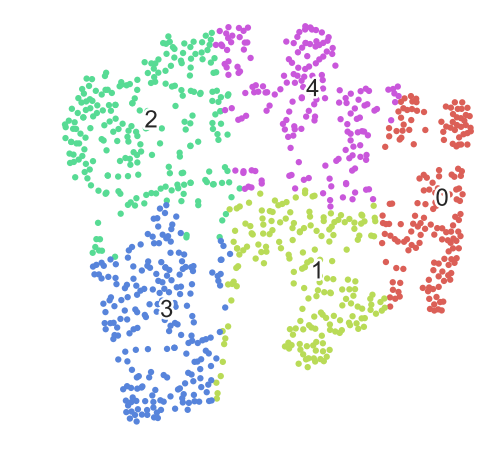

In [95]:
scatter(cluster_proj, y)